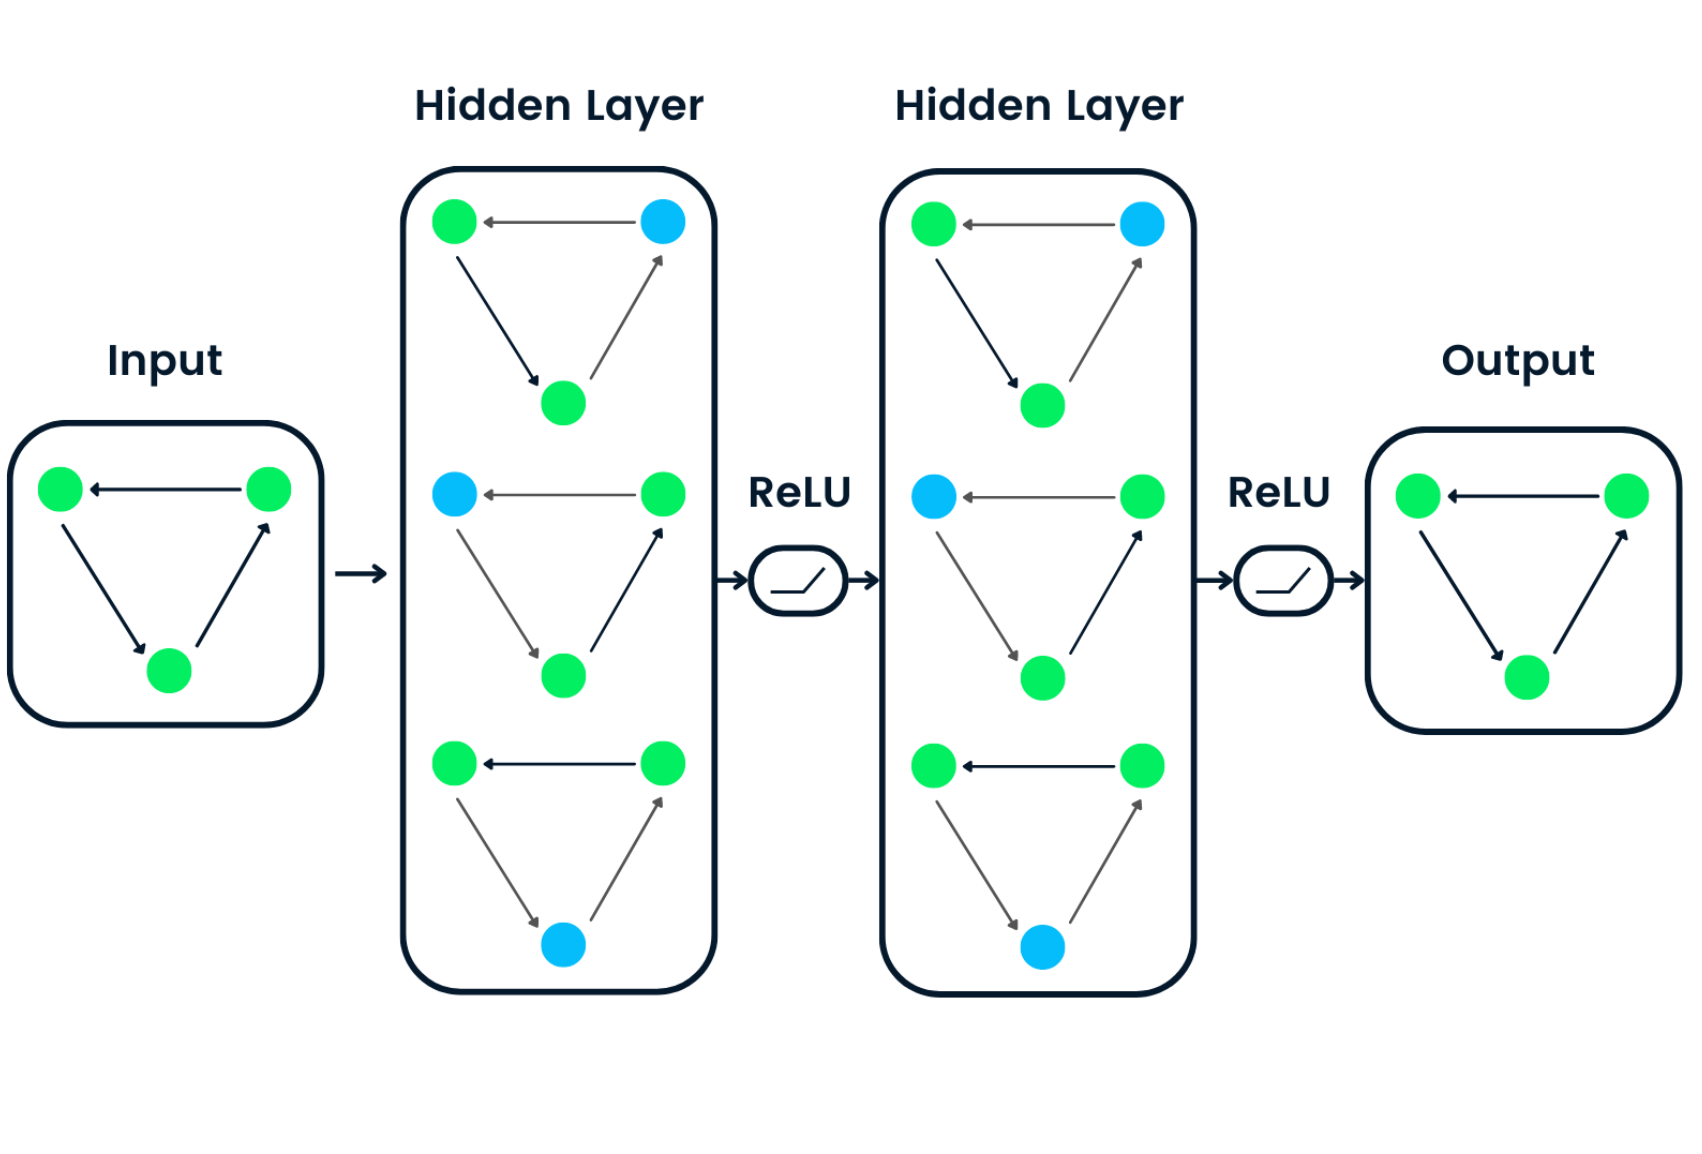

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the CNN architecture
class neural_network(nn.Module):
    def __init__(self):
        super(neural_network, self).__init__()
        # Define the first convolutional layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        # Define the second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Define a max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # Define a fully connected layer
        self.fc1 = nn.Linear(64 * 7 * 7, 128) # after two pooling layers, the image size is reduced to 7x7
        # Define another fully connected layer for the output (10 classes for the digits 0-9)
        self.fc2 = nn.Linear(128, 10)
        # Define an activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Pass the input tensor through the convolutional layers, activation functions, and pooling layers
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        # Flatten the tensor so it can be fed into the fully connected layers
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the CNN
model = neural_network()

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# A dummy input tensor (e.g., an image from MNIST dataset)
input = torch.randn(64, 1, 28, 28)  # Batch size of 64, 1 color channel, 28x28 images
labels = torch.randint(0, 10, (64,))  # Randomly generated labels for the batch

# Zero the parameter gradients
optimizer.zero_grad()

# Forward pass: compute predicted outputs by passing inputs to the model
outputs = model(input)

# Compute the loss
loss = criterion(outputs, labels)

# Backward pass: compute gradient of the loss with respect to model parameters
loss.backward()

# Perform a single optimization step to update the model's parameters
optimizer.step()

# Print out the loss to see if it's decreasing over time
print(f'Loss: {loss.item()}')
